In [1]:
import pandas as pd
import numpy as np
import Exploration as e

In [2]:
def read_data(path):
    """_summary_

    Args:
        path (_type_): path de mon data 
    """
    if path =='':
        print('path incorrecte')
    else:
        data=pd.read_csv(path)
    return data

In [3]:
data=read_data(e.PATH)
schema=read_data(e.PATHSC)

In [4]:
def check_rows_cols(num_rows, num_cols):
    '''
    INPUT:
    num_rows - int the number of rows in df
    num_cols - int the number of cols in df

    This function will print a statement related to whether or not you provided the correct number of rows and columns of the dataset.
    '''
    if num_rows == e.num_rows:
        print("Nice job there are {} rows in the dataset!".format(num_rows))
    else:
        print("That doesn't look like what we were expecting for the number of rows.")

    if num_cols == e.num_cols:
        print("Nice job there are {} columns in the dataset!".format(num_cols))
    else:
        print("That doesn't look like what we were expecting for the number of columns.")


In [5]:
check_rows_cols(data.shape[0], data.shape[1])
# rows for 0
# columns for 1

Nice job there are 19102 rows in the dataset!
Nice job there are 154 columns in the dataset!


In [6]:
np.sum(data.isnull())

Respondent                  0
Professional                0
ProgramHobby                0
Country                     0
University                  0
                        ...  
QuestionsInteresting     6366
QuestionsConfusing       6396
InterestedAnswers        6342
Salary                  14093
ExpectedSalary          18284
Length: 154, dtype: int64

In [7]:
np.sum(data.isnull())==0

Respondent               True
Professional             True
ProgramHobby             True
Country                  True
University               True
                        ...  
QuestionsInteresting    False
QuestionsConfusing      False
InterestedAnswers       False
Salary                  False
ExpectedSalary          False
Length: 154, dtype: bool

In [8]:
data.columns[np.sum(data.isnull())==0]

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation'],
      dtype='object')

In [14]:
schema.head(10)

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
5,EmploymentStatus,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,MajorUndergrad,Which of the following best describes your mai...
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large..."


In [22]:
list(schema[schema['Column'] == 'University']['Question'])[0]

'Are you currently enrolled in a formal, degree-granting college or university program?'

In [28]:
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [31]:
def get_description(schema, column_name):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT -
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc

descrips = set(get_description(schema, col) for col in data.columns)

In [45]:

['CousinEducation'in list(data.columns)]

[True]

In [32]:
study=data['CousinEducation'].value_counts().reset_index()
study.rename(columns={'index':'method','CousinEducation':'count'},inplace=True)
study

,method,count
0,Take online courses; Buy books and work throug...,192
1,None of these,167
2,Take online courses,158
3,Take online courses; Part-time/evening courses...,140
4,Take online courses; Bootcamp; Part-time/eveni...,132
...,...,...
596,Return to college; Get a job as a QA tester; P...,1
597,Master's degree; Participate in online coding ...,1
598,Participate in hackathons; Participate in onli...,1
599,Master's degree; Get a job as a QA tester; Par...,1


In [ ]:
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]




In [ ]:
higher_ed = lambda x: 1 if x in ("Master's degree", "Doctoral", "Professional degree") else 0

data['HigherEd'] = data["FormalEducation"].apply(higher_ed)
higher_ed_perc = data['HigherEd'].mean()



In [17]:
data.shape

(19102, 154)

<AxesSubplot:>

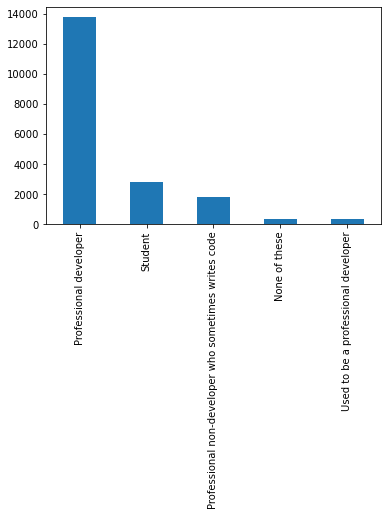

In [38]:
# Provide a pandas series of the different Professional status values in the dataset. Store this pandas series in status_vals. If you are correct, you should see a bar chart of the proportion of individuals in each status.
status_vals = data.Professional.value_counts()  # "for categorical variables "
status_vals.plot(kind="bar")
## salma if you wanna with % only divide (status_vals//data.shape[0])


In [41]:
def most_missing_cols(data,per):
    '''
    INPUT:
    data - ot=ur data 
    per  - a set of columns with more than 75% of the values in the column missing
    This function will print set of columns with more than 75% of the values in the column missing
    #Which columns had no missing values? Provide a set of column names that have no missing values.
    '''
    most_missing_cols=set(data.columns[data.isnull().mean()>per])
    if len(most_missing_cols)== 0:
        print("Nice job that looks right!")
    else:
        print("There should be {} columns in your list and the columns are {}".format(len(most_missing_cols),most_missing_cols))

In [42]:
most_missing_cols(data,0.75)

There should be 14 columns in your list and the columns are {'ExCoderNotForMe', 'MobileDeveloperType', 'YearsCodedJobPast', 'ExCoder10Years', 'NonDeveloperType', 'ExCoderActive', 'ExCoderSkills', 'ExCoderBelonged', 'ExCoderWillNotCode', 'WebDeveloperType', 'TimeAfterBootcamp', 'ExCoderReturn', 'ExpectedSalary', 'ExCoderBalance'}


In [ ]:
# business questions :
# 1/ how to enter the field 
# 2/ what are job placements and salary rates for bootcamps 
# 3/ what relates to salary
# 4/ what relates to job satisfaction


In [4]:
e.schema

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
...,...,...
149,QuestionsInteresting,The questions were interesting
150,QuestionsConfusing,The questions were confusing
151,InterestedAnswers,I'm interested in learning how other developer...
152,Salary,"What is your current annual base salary, befor..."


In [6]:
desc = list(e.schema[e.schema['Column'] =='CousinEducation' ]['Question'])[0]
desc

"Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which 

In [ ]:
# 1/ "How might I break into the field of software development?"
# this is our first question what are those those important industries suggest to help others break into the field
df[df['']]['']

study=df['CousinEducation'].value_counts().reset_index()
study.rename(columns={'':'','':''},inplace=True)
